# Team Mobile Madness

---

You are on the data science department of a mobile device company. In an effort to extend account lifetime of existing customers, we need to develop targeted A/B experiments. In order to do that efficiently, we need to have a better degree of certainty about which customers are likely to to "churn" and why.

**Goals:**
- Research the concept of "churn" and A/B testing.
- Identify behaviors strongly correlated with churn in this dataset.
- Suggest what A/B tests we should develop going forward.


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./datasets/churn-bigml-20.csv")

In [2]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [13]:
df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [41]:
df['Churn'] = [1 if i == True else 0 for i in df['Churn']]
df['International plan'] = [1 if i == 'Yes' else 0 for i in df['International plan']]
df['Voice mail plan'] = [1 if i == 'Yes' else 0 for i in df['Voice mail plan']]

In [27]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [36]:
df['Customer service calls'].value_counts()

1    236
2    151
0    142
3     81
4     33
5     17
6      5
8      1
7      1
Name: Customer service calls, dtype: int64

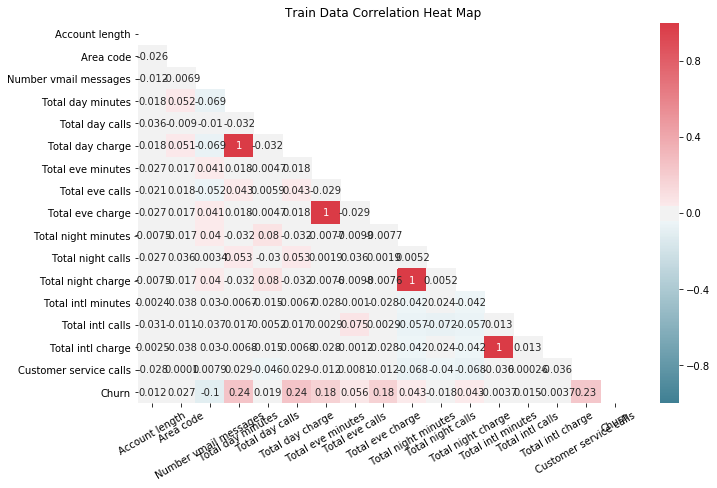

In [35]:
# Plot a heatmap on train data to see correlations in numbers.
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, annot=True, mask=mask, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.title('Train Data Correlation Heat Map')
    
correlation_heat_map(df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
State                     667 non-null object
Account length            667 non-null int64
Area code                 667 non-null int64
International plan        667 non-null object
Voice mail plan           667 non-null object
Number vmail messages     667 non-null int64
Total day minutes         667 non-null float64
Total day calls           667 non-null int64
Total day charge          667 non-null float64
Total eve minutes         667 non-null float64
Total eve calls           667 non-null int64
Total eve charge          667 non-null float64
Total night minutes       667 non-null float64
Total night calls         667 non-null int64
Total night charge        667 non-null float64
Total intl minutes        667 non-null float64
Total intl calls          667 non-null int64
Total intl charge         667 non-null float64
Customer service calls    667 non-null int64
Churn                

In [42]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [38]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

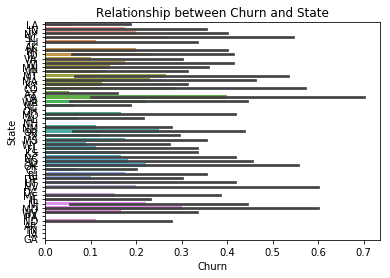

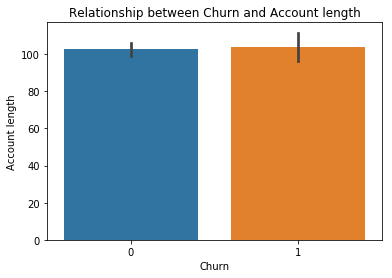

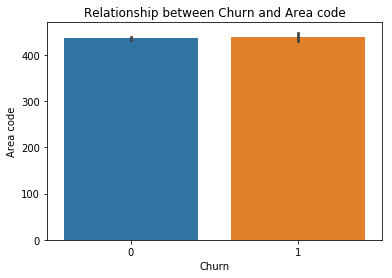

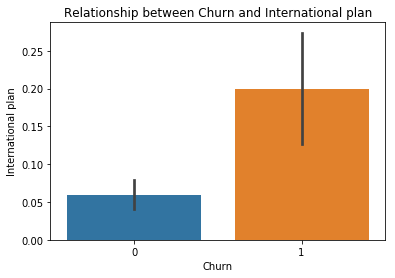

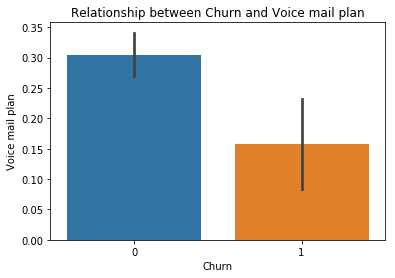

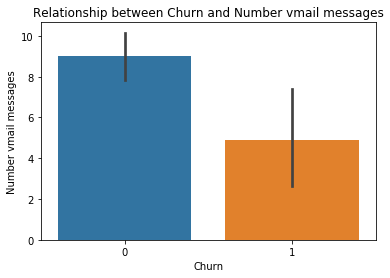

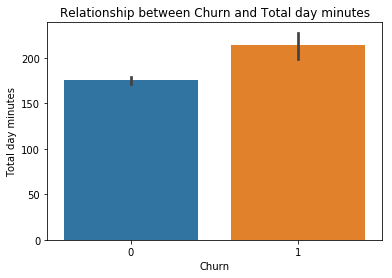

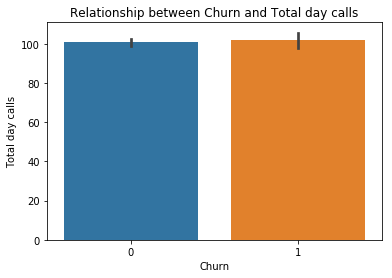

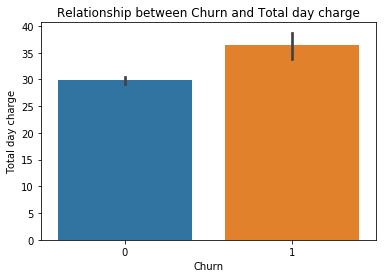

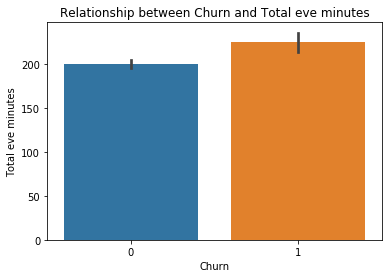

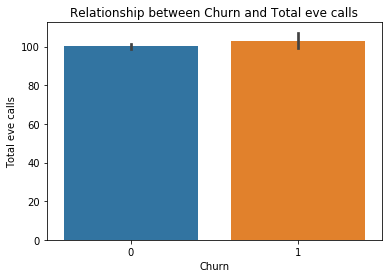

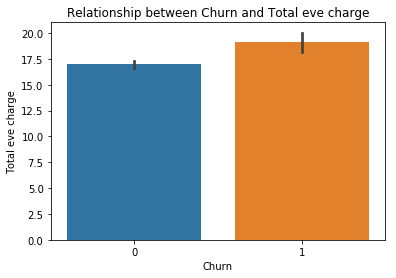

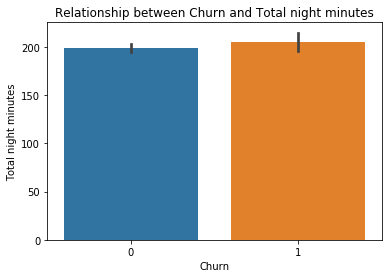

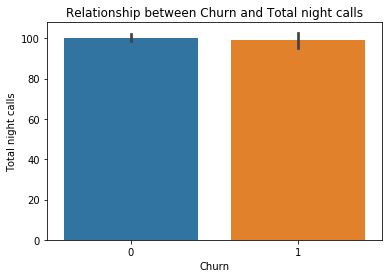

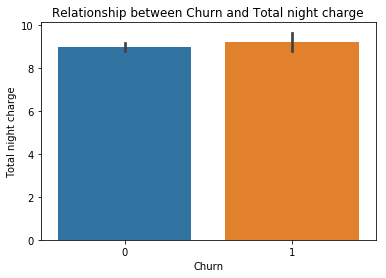

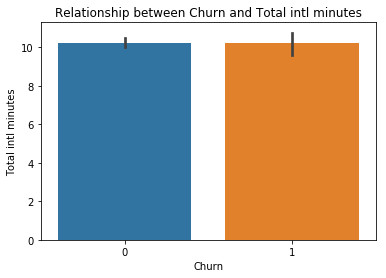

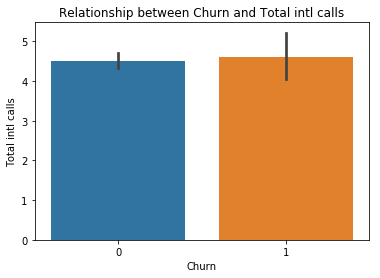

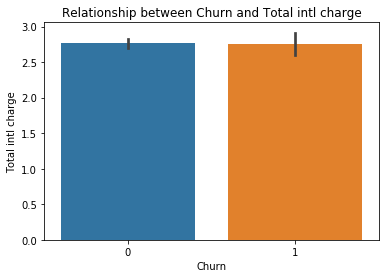

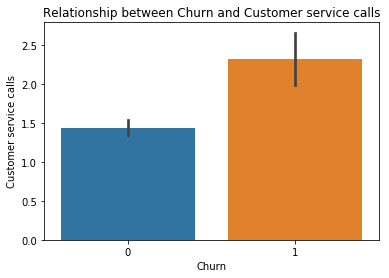

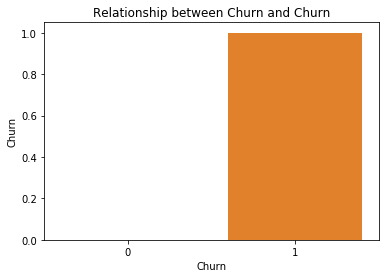

In [54]:
plot_columns = df.columns

for i in plot_columns:
    sns.barplot(x=df['Churn'],
                y=df[i]).set(title=f'Relationship between Churn and {i}')
    plt.show();
    print

In [47]:
# Baseline accuracy
baseline = 1-(df['Churn'].mean())
print('Baseline Accuracy:', baseline)

Baseline Accuracy: 0.8575712143928036


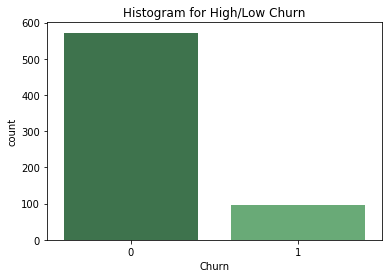

In [49]:
# Plot a bargraph to compare churn
ax = plt.axes()
sns.countplot(x="Churn", data=df, palette="Greens_d")
ax.set_title('Histogram for High/Low Churn')
plt.show();

In [51]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [52]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

score = logreg1.score(X_test, y_test)
cvs = cross_val_score(logreg1, X_test, y_test, cv=5).mean()

print('Baseline Accuracy:', baseline)
print('1st Logistic Regression Model Score with Subreddit Feature:', score)
print('1st Logistic Regression 5 Folds Cross-Validation Score:', cvs)

Baseline Accuracy: 0.8575712143928036
1st Logistic Regression Model Score with Subreddit Feature: 0.8562874251497006
1st Logistic Regression 5 Folds Cross-Validation Score: 0.8743315508021391


In [55]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
 
params_grid = {'penalty': ['l1', 'l2'],'C': [.001, .1, 1.0, 10.0]}

gs = GridSearchCV(logreg1, params_grid, verbose=1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [56]:
best_logreg = gs.best_estimator_
best_score = best_logreg.score(X_test, y_test)
cvs = cross_val_score(best_logreg, X_test, y_test, cv=5).mean()

print('Best Logistic Regression Estimator:\n\t', best_logreg)
print('Logistic Regression Best Score:', best_score)
print('5 folds Cross-Validation Score:', cvs)

Best Logistic Regression Estimator:
	 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic Regression Best Score: 0.8532934131736527
5 folds Cross-Validation Score: 0.8502806821507436


In [57]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rand_forest1 = RandomForestClassifier()
rand_forest1.fit(X_train, y_train)


score = rand_forest1.score(X_test, y_test)
cvs = cross_val_score(rand_forest1, X_test, y_test, cv=5).mean()

print('Baseline Accuracy:', baseline)
print('1st Random Forest Model Score with Subreddit:', score)
print('1st Random Forest 5 Folds Cross-Validation Score:', cvs)

Baseline Accuracy: 0.8575712143928036
1st Random Forest Model Score with Subreddit: 0.907185628742515
1st Random Forest 5 Folds Cross-Validation Score: 0.9071460877431026


In [ ]:
RandomForestClassifier()

In [62]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
 
params_grid = {'n_estimators': [2,4], 'min_samples_split': [2], 
               'min_samples_leaf': [1], 'min_impurity_decrease': [0.0],
               'n_jobs': [-1], 'verbose': [0]}

gs = GridSearchCV(rand_forest1, params_grid, verbose=1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 4], 'min_samples_split': [2], 'min_samples_leaf': [1], 'min_impurity_decrease': [0.0], 'n_jobs': [-1], 'verbose': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [63]:
best_rand_forest = gs.best_estimator_
best_score = best_rand_forest.score(X_test, y_test)
cvs = cross_val_score(best_rand_forest, X_test, y_test, cv=5).mean()

print('Best Logistic Regression Estimator:\n\t', best_rand_forest)
print('Logistic Regression Best Score:', best_score)
print('5 folds Cross-Validation Score:', cvs)

Best Logistic Regression Estimator:
	 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Logistic Regression Best Score: 0.8652694610778443
5 folds Cross-Validation Score: 0.8862745098039216
